Informal introduction to machine learning aka machine learning for the stupid (mainly myself).

In [1]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for visualization (plotting)

# to display plots inline (with the rest of the output) rather than in a separate window
%matplotlib inline

For our simple introductory problem our goal is to build a machine that is capable of approximating functions that take the form $a+bx$. The machine is often called hyphothesis function, ie. the machine provides a hyphothesis $h(x)=a+bx$ of the target function.

In [2]:
class Machine:
    a = 0
    b = 0
    def h(self, x):
        return self.a + self.b * x

For the target function to approximate by the hyphothesis function we could pick something like $t(x)=3+2x$.

In [3]:
def t(x):
    return 3 + 2 * x

Lets create a training set of random values, and then compare the values provided by the hyphothesis function $h(x)$ to the correct values provided by the actual function $t(x)$.

[-3  0  4]


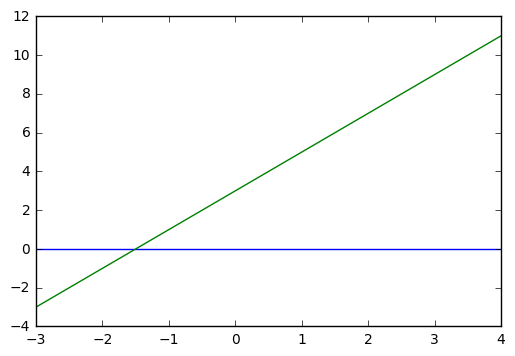

In [4]:
n = 3 # number of training samples
np.random.seed(876)
training_set = np.random.randint(-5, 6, n)
print(training_set)

# Calculate the values of h and f for each value in the training set
machine = Machine()
h_values = []
t_values = []
for x in training_set:
    h_values.append(machine.h(x))
    t_values.append(t(x))   
                                                         
# Visualize how badly the hyphothesis fails initially
plt.plot(training_set, h_values)
plt.plot(training_set, t_values)
plt.show()

# Loss function
To improve our hyphothesis we need a way to represent the amount of loss (how bad the hyphothesis is failing) with a single number. To improve the hyphothesis is to decrease the loss.

A simple way to measure the loss is to use the average mean squared error of training examples:

$$\frac{1}{n}\sum_{i=1}^{n}(h(x_i)-t(x_i))^2, \text{where n is the number of training examples}$$

46.3333333333


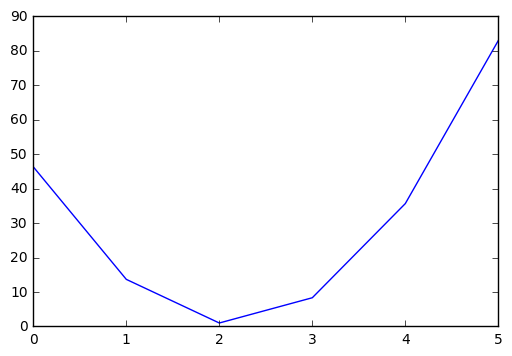

In [5]:
machine = Machine()
def loss(training_set):
    loss = 0
    for x in training_set:
        loss += (machine.h(x) - t(x))**2
        
    return loss / n

print(loss(training_set))    

iterations = 6
losses = []
for i in range(0, iterations):
    losses.append(loss(training_set))     
    machine.a += 1
    machine.b += 1
   
plt.plot(losses)
plt.show()

[0, 0, 0]
[-2, 1, 5]
[-4, 2, 10]
[-6, 3, 15]
[-8, 4, 20]
[-10, 5, 25]


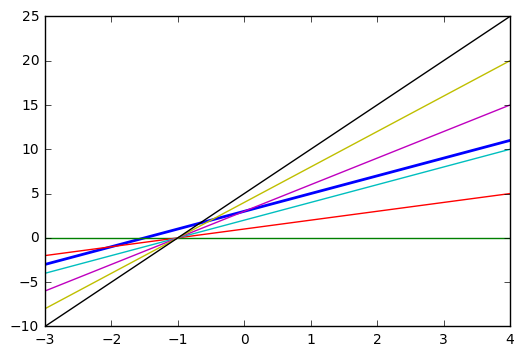

In [6]:
machine = Machine()
plt.plot(training_set, t_values, linewidth=2.0)
for i in range(0,iterations):
    h_values = []
    for x in training_set:
        h_values.append(machine.h(x))
        
    machine.a += 1
    machine.b += 1
        
    print(h_values) 
    plt.plot(training_set, h_values)
    
plt.show()    

By a lucky strike we actually managed to get a pretty close approximation. But we want a system that can automatically adjust a and b in the right direction and tell when it has reached the best approximation.

# Gradient descent
Gradient descent is a popular method for doing exactly what we want: Find optimal values of a and b so that the loss becomes minimal.

Gradient is a generalization of the derivative to functions of several variables. Gradient descent means that we subtract the gradient from a and b. (Ascent would mean to add) 

When we open up $l(a,b)$ we get (Chain rule could also be mentioned):

$$\begin{align}
l(a,b) &= (h(x) - t(x))^2 \\
& = (a + bx - y)^2 \\
&= a^2+2abx-2ay+b^2x^2-2bxy+y^2 \\
\end{align}$$

A function with two variables can also be interpreted as a family of functions with one variable:

$$
l(a,b) = 
\begin{cases}
l_b(a) = a^2+2bxa-2ya+b^2x^2-2bxy+y^2, &\text{a is a variable, b, x, and y are constants} \\
l_a(b) = x^2b^2+2axb-2xyb+a^2-2ay+y^2, &\text{b is a variable, a, x, and y are constants} \\
\end{cases}
$$

Here $l_b$ and $l_a$ each represent a family of functions, eg. $l_b$ contains functions with every value of b as a constant. Functions have been rearranged so that the constant values are in the end.

Gradient $l'(a,b)$ is the combination of the partial derivatives $l_b'(a)$ and $l_a'(b)$. In other words $l'(a,b)$ is a vector whose components are $l_b'(a)$ and $l_a'(b)$:

$$
l'(a,b) = 
\begin{cases}
l_b'(a) = 2a+2bx-2y = 2(a+bx-y) = 2(h(x)-t(x)) \\
l_a'(b) = 2x^2b+2ax-2xy = 2x(a+bx-y) = 2x(h(x)-t(x)) \\
\end{cases}
$$

Above equation only counts for one training set ie. one value for each x and y. For n training sets the equation can be represented as a sum over n training sets:

$$
\begin{align}
l(a,b) &= \sum_{i=1}^{n}(h(x_i)-t(x_i))^2 \\
l'(a,b) &= 
\begin{cases}
l_b'(a) = \frac{2}{n}\displaystyle\sum_{i=1}^n(h(x_i)-t(x_i)) \\
l_a'(b) = \frac{2}{n}\displaystyle\sum_{i=1}^n(h(x_i)-t(x_i))x_i \\
\end{cases}
\end{align}
$$

[46.333333333333336, 13.666666666666666, 1.0, 8.3333333333333339, 35.666666666666664, 83.0]
[(-7.333333333333333, -35.333333333333336), (-4.666666666666667, -18.0), (-2.0, -0.66666666666666663), (0.66666666666666663, 16.666666666666668), (3.3333333333333335, 34.0), (6.0, 51.333333333333336)]
[31.333333333333332, 13.333333333333332, -4.6666666666666643, -22.666666666666664, -40.666666666666671, -58.666666666666671]


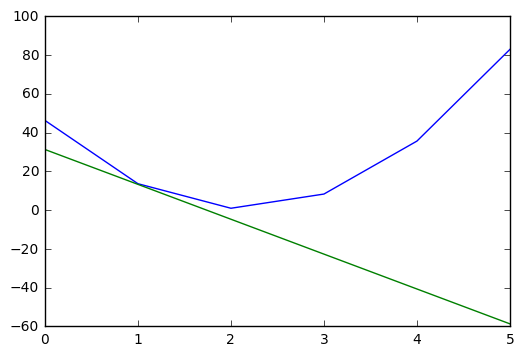

In [7]:
machine = Machine()
def loss(training_set):
    loss = 0
    for x in training_set:
        loss += (machine.h(x) - t(x))**2
        
    return loss / n

def gradient(training_set):
    da = 0
    db = 0
    for x in training_set:
        da += machine.h(x) - t(x)
        db += (machine.h(x) - t(x)) * x
        
    return (2 * da / n, 2 * db / n)    

iterations = 6
losses = []
gradients = []
for i in range(0,iterations):
    losses.append(loss(training_set))
    gradients.append(gradient(training_set))
    machine.a += 1
    machine.b += 1

print(losses)
print(gradients)

gradient1 = []
machine.a = gradients[1][0]
machine.b = gradients[1][1]
#for x in training_input:
for i in range(0, iterations):
    gradient1.append(machine.h(i) + 36)
    
print(gradient1)
    
plt.plot(losses)
plt.plot(gradient1)
plt.show()

-11
-53
46.3333333333
837.666666667
-604.777777778
-13154.3333333
9374.33333333
206487.740741
-147032.82716
-3241224.16049
[46.333333333333336, 9374.3333333333358, 2307848.9341563783, 568635786.22908068, 140107818823.06448]


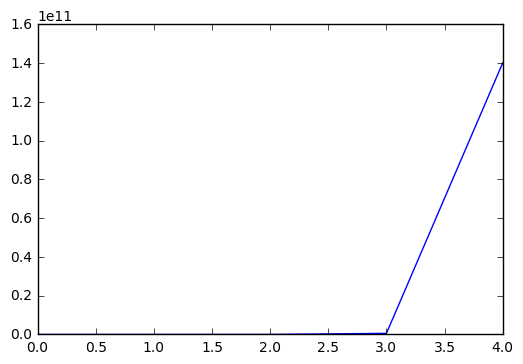

92151.9588477
2031404.05761


In [8]:
# Now let's actually use the Gradient descent
machine = Machine()
def gradient_descent(machine, training_set):
    iterations = 5
    losses = []
    for i in range(0,iterations):        
        losses.append(loss(training_set))
        da = 0
        db = 0
        for x in training_set:
            da += machine.h(x) - t(x)
            db += (machine.h(x) - t(x)) * x
        print(da)
        print(db)
        machine.a -= 2 * da / n
        machine.b -= 2 * db / n
        
    print(losses)    
    plt.plot(losses)
    plt.show()

gradient_descent(machine, training_set)
print(machine.a)
print(machine.b)

Ok, something is clearly wrong. We take the gradient of loss function and decrease a and b according to that, but the result is not good. Loss actually increases ridiculously fast: difference between 3 and 4 iterations is so high that values before that won't even show on the graph.

The problem is we are changing a and b so drastically that their values keep overshooting the optimal values. What we want is minor changes so that the values slowly approach the optimum without fear of overshooting. To do this we will ad an extra parameter to the equation called alpha:

$$
\begin{align}
a &= a - \alpha\displaystyle\sum_{i=1}^n(h(x_i)-t(x_i)) \\
b &= b - \alpha\displaystyle\sum_{i=1}^n(h(x_i)-t(x_i))x_i \\
\end{align}
$$

If we set alpha just right gradient descent will be nice and smooth.

Now how do we pick the right value of alpha?

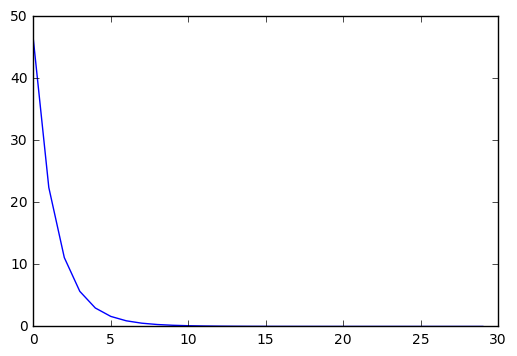

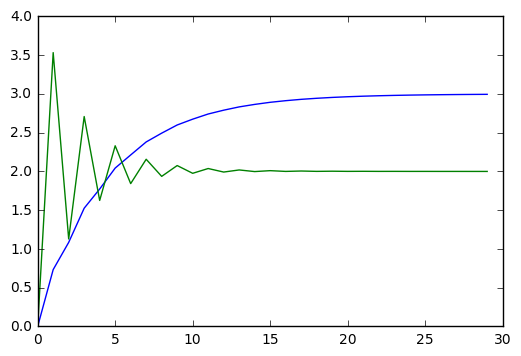

2.99597457535
2.00016983747


In [9]:
machine = Machine()
def gradient_descent(machine, training_set):
    alpha = 0.2
    iterations = 30
    losses = []
    a_values = []
    b_values = []
    for i in range(0, iterations):
        a_values.append(machine.a)
        b_values.append(machine.b)
        losses.append(loss(training_set))
        da = 0
        db = 0
        for x in training_set:
            da += machine.h(x) - t(x)
            db += (machine.h(x) - t(x)) * x
        machine.a -= alpha * da / n
        machine.b -= alpha * db / n
        
    #print(losses)    
    plt.plot(losses)
    plt.show()
    plt.plot(a_values)
    plt.plot(b_values)
    plt.show()

gradient_descent(machine, training_set)
print(machine.a)
print(machine.b)

By testing different values of $\alpha$ and different amounts of iterations we figure out that  0.01 is about the right value for alpha and with 100 iterations we can get to a pretty much perfect approximation: a is 2.99 and b is 2.00.

It turns out that if we also devide the gradient with m, we can lower the alpha to 0.1 and get as good approximation with only 30 iterations. Probably without deviding with m the loss can easily get to such high values that computer will run out of memory. In our example the number of training examples is only 3, and we still get into trouble, so imagine a real world training set with thousands or even millions of examples.

To test with other target function we could modify our gradient_descent function to accept target functions as arguments. We'll also discard the loss function at this point because it's not that interesting:

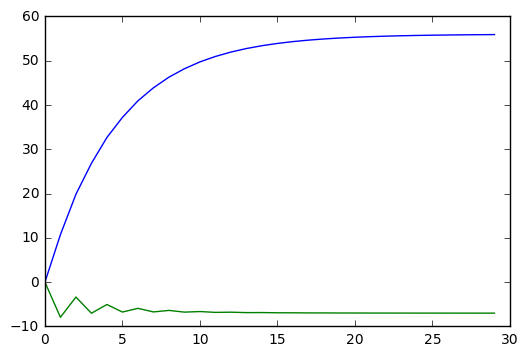

55.9220885985
-6.99643921908


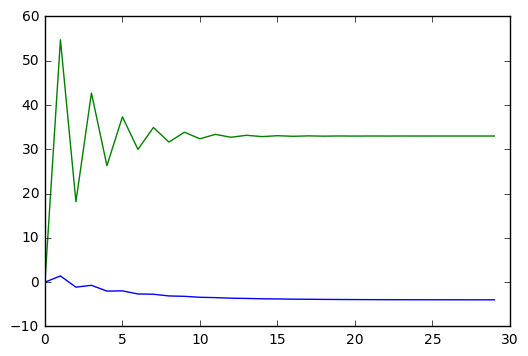

-3.99240415716
32.9994594033


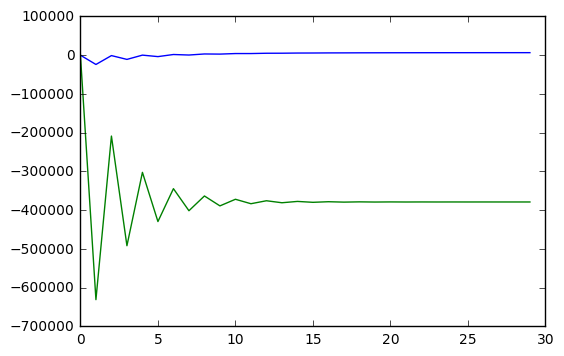

6543.23393724
-378785.252785


In [10]:
def gradient_descent(machine, t, training_set):
    alpha = 0.2
    iterations = 30
    losses = []
    a_values = []
    b_values = []
    n = training_set.size
    for i in range(0, iterations):
        a_values.append(machine.a)
        b_values.append(machine.b)
        da = 0
        db = 0
        for x in training_set:
            da += machine.h(x) - t(x)
            db += (machine.h(x) - t(x)) * x
        machine.a -= alpha * da / n
        machine.b -= alpha * db / n
    plt.show()
    plt.plot(a_values)
    plt.plot(b_values)
    plt.show()

def trainer(t):
    n = 3
    np.random.seed(876)
    training_set = np.random.randint(-5, 6, n) 
    machine = Machine()
    gradient_descent(machine, t, training_set)
    print(machine.a)
    print(machine.b)
 
trainer(lambda x: 56 - 7 * x)
trainer(lambda x: -4 + 33 * x)
trainer(lambda x: 6576 - 378789 * x)

We could also try different combinations of samples, alpha and the number of iterations:

[-3  0  4]


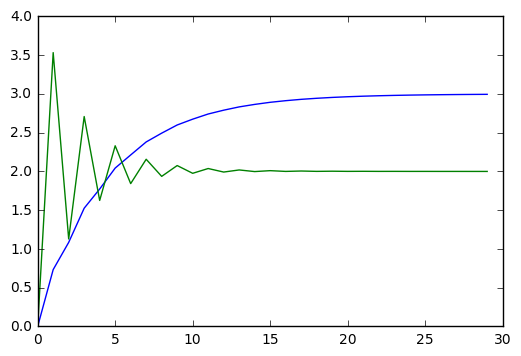

2.99597457535
2.00016983747
[-3  0  4  4 -5 -4 -1 -1  1  5]


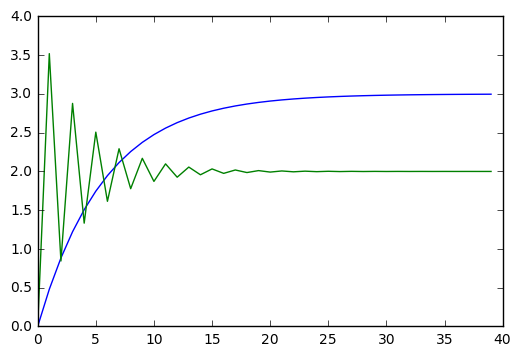

2.99719267497
1.99996583561
[ 3 -5 -3  1  0 -4  5  0 -3 -1 -5 -5 -2 -4  5  4 -3  0  5 -5  1 -2  0 -4  2
 -1 -2 -4 -2 -5  0  5  2  5 -1 -3 -4 -3  4 -1 -4 -2 -3  3  3  1 -2 -5  3  2
  0  0 -3  5  3  1  0  5  3 -5  1  3  2 -2 -1 -4  0 -1 -2  3 -3  2  2  1 -1
  5  0  0  5  0  4  4  1  3  3  1 -4  2  0  0 -5  4  1  2 -4  2  5 -4 -2 -3]


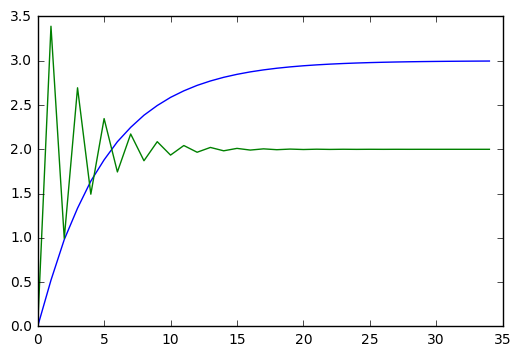

2.99709406985
1.9999942048


In [12]:
def gradient_descent(machine, t, training_set, alpha, iterations):
    a_values = []
    b_values = []
    n = training_set.size
    for i in range(0, iterations):
        a_values.append(machine.a)
        b_values.append(machine.b)
        da = 0
        db = 0
        for x in training_set:
            da += machine.h(x) - t(x)
            db += (machine.h(x) - t(x)) * x
        machine.a -= alpha * da / n
        machine.b -= alpha * db / n
    plt.plot(a_values)
    plt.plot(b_values)
    plt.show()

def trainer(t, n, alpha, iterations, seed):
    np.random.seed(seed)
    training_set = np.random.randint(-5, 6, n) 
    print(training_set)
    machine = Machine()
    gradient_descent(machine, t, training_set, alpha, iterations)
    print(machine.a)
    print(machine.b)
 
trainer(t, n = 3, alpha = 0.2, iterations = 30, seed = 876)
trainer(t, n = 10, alpha = 0.16, iterations = 40, seed = 876)
trainer(t, n = 100, alpha = 0.18, iterations = 35, seed = 654)

From testing several different parameter combinations I got very surprising results: It turns out that the training set of just 3 examples we picked up initially was just perfect. All other combinations (I'm showing only few) led to the need to increase the sample size and lower the alpha (which makes the gradient descent slower and leads to the need to also increase the number of iterations). Even using the same seed for random values but increasing the amount of samples led to poorer results.